In [1]:
!nvidia-smi

Wed Feb 15 08:42:20 2023       
+-----------------------------------------------------------------------------+
| NVIDIA-SMI 510.47.03    Driver Version: 510.47.03    CUDA Version: 11.6     |
|-------------------------------+----------------------+----------------------+
| GPU  Name        Persistence-M| Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp  Perf  Pwr:Usage/Cap|         Memory-Usage | GPU-Util  Compute M. |
|                               |                      |               MIG M. |
|===============================+======================+======================|
|   0  Tesla T4            Off  | 00000000:00:04.0 Off |                    0 |
| N/A   70C    P0    31W /  70W |      0MiB / 15360MiB |      0%      Default |
|                               |                      |                  N/A |
+-------------------------------+----------------------+----------------------+
                                                                               
+-------

In [2]:
import os
HOME = os.getcwd()
print(HOME)

/content


In [3]:
# Pip install method (recommended)

!pip install ultralytics==8.0.20

from IPython import display
display.clear_output()

import ultralytics
ultralytics.checks()

Ultralytics YOLOv8.0.20 🚀 Python-3.8.10 torch-1.13.1+cu116 CUDA:0 (Tesla T4, 15110MiB)
Setup complete ✅ (2 CPUs, 12.7 GB RAM, 32.3/78.2 GB disk)


In [ ]:
# Git clone method (for development)

# %cd {HOME}
# !git clone github.com/ultralytics/ultralytics
# %cd {HOME}/ultralytics
# !pip install -qe ultralytics

# from IPython import display
# display.clear_output()

# import ultralytics
# ultralytics.checks()

In [4]:
from ultralytics import YOLO

from IPython.display import display, Image

In [5]:
%cd {HOME}
!yolo task=detect mode=predict model=yolov8n.pt conf=0.25 source='https://media.roboflow.com/notebooks/examples/dog.jpeg' save=True

/content
100% 6.23M/6.23M [00:00<00:00, 131MB/s]

Ultralytics YOLOv8.0.20 🚀 Python-3.8.10 torch-1.13.1+cu116 CUDA:0 (Tesla T4, 15110MiB)
YOLOv8n summary (fused): 168 layers, 3151904 parameters, 0 gradients, 8.7 GFLOPs
100% 104k/104k [00:00<00:00, 7.88MB/s]
image 1/1 /content/dog.jpeg: 640x384 1 person, 1 car, 1 dog, 14.9ms
Speed: 0.5ms pre-process, 14.9ms inference, 57.7ms postprocess per image at shape (1, 3, 640, 640)
Results saved to runs/detect/predict


/content


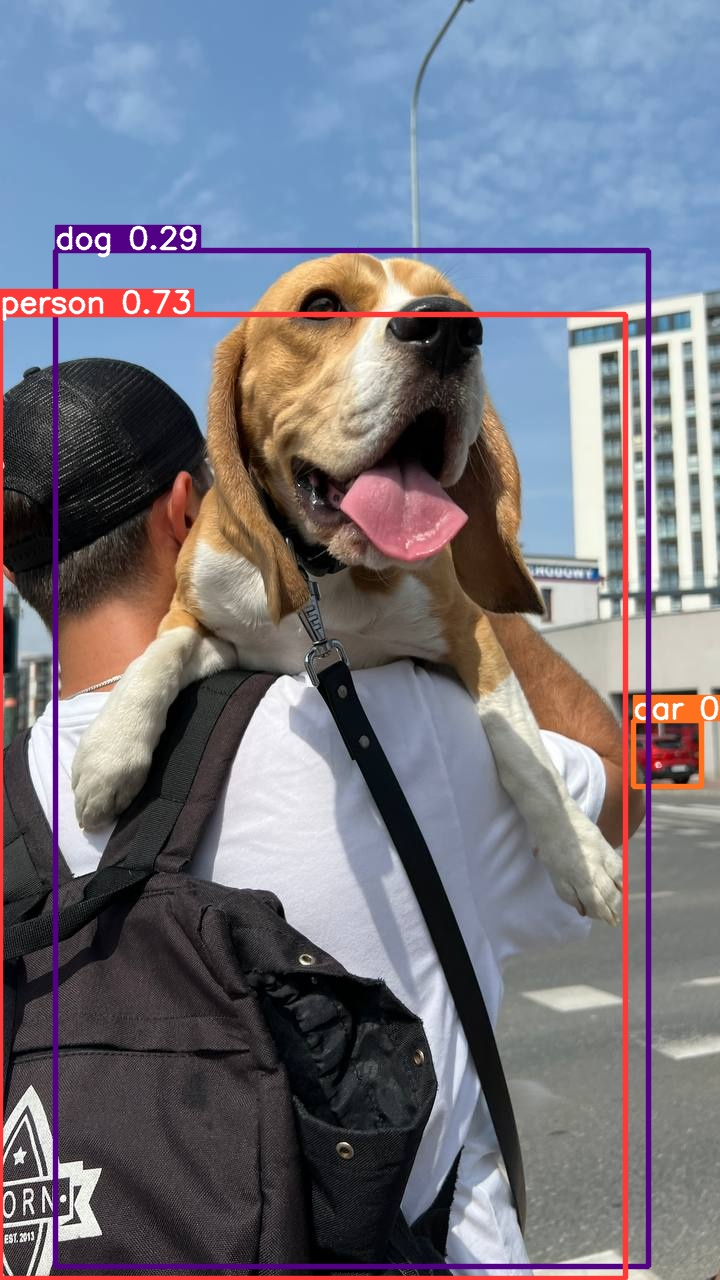

In [6]:
%cd {HOME}
Image(filename='runs/detect/predict/dog.jpeg', height=600)

### 🐍 Python SDK

The simplest way of simply using YOLOv8 directly in a Python environment.

In [7]:
model = YOLO(f'{HOME}/yolov8n.pt')
results = model.predict(source='https://media.roboflow.com/notebooks/examples/dog.jpeg', conf=0.25)

Ultralytics YOLOv8.0.20 🚀 Python-3.8.10 torch-1.13.1+cu116 CUDA:0 (Tesla T4, 15110MiB)
YOLOv8n summary (fused): 168 layers, 3151904 parameters, 0 gradients, 8.7 GFLOPs
Found https://media.roboflow.com/notebooks/examples/dog.jpeg locally at dog.jpeg


In [10]:
results[0].boxes.xyxy

tensor([[   0.,  314.,  625., 1278.],
        [  55.,  250.,  648., 1266.],
        [ 633.,  720.,  701.,  786.]], device='cuda:0')

In [8]:
results[0].boxes.conf

tensor([0.72712, 0.29066, 0.28456], device='cuda:0')

In [9]:
results[0].boxes.cls

tensor([ 0., 16.,  2.], device='cuda:0')

In [11]:
!mkdir {HOME}/datasets
%cd {HOME}/datasets

!pip install roboflow --quiet

from roboflow import Roboflow
rf = Roboflow(api_key="___")
project = rf.workspace("tatsi-shagova-pftso").project("headphones-detection")
dataset = project.version(4).download("yolov8")


/content/datasets
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 49.0/49.0 KB 4.0 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 54.5/54.5 KB 3.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 67.8/67.8 KB 8.3 MB/s eta 0:00:00
loading Roboflow workspace...
loading Roboflow project...


Extracting Dataset Version Zip to Headphones-detection-4 in yolov8:: 100%|██████████| 608/608 [00:01<00:00, 597.67it/s]


## Custom Training

In [49]:
# the third attempt

In [59]:
# %cd {HOME}

# !yolo task=detect mode=train model=yolov8s.pt data={dataset.location}/data.yaml epochs=25 imgsz=800 plots=True

In [55]:
!ls {HOME}/runs/detect/train/

args.yaml					    state_dict.pt
confusion_matrix.png				    train_batch0.jpg
events.out.tfevents.1676450730.071f05257c11.1039.0  train_batch1.jpg
F1_curve.png					    train_batch255.jpg
model_artifacts.json				    train_batch256.jpg
P_curve.png					    train_batch257.jpg
PR_curve.png					    train_batch2.jpg
R_curve.png					    val_batch0_labels.jpg
results.csv					    val_batch0_pred.jpg
results.png					    weights
roboflow_deploy.zip


/content


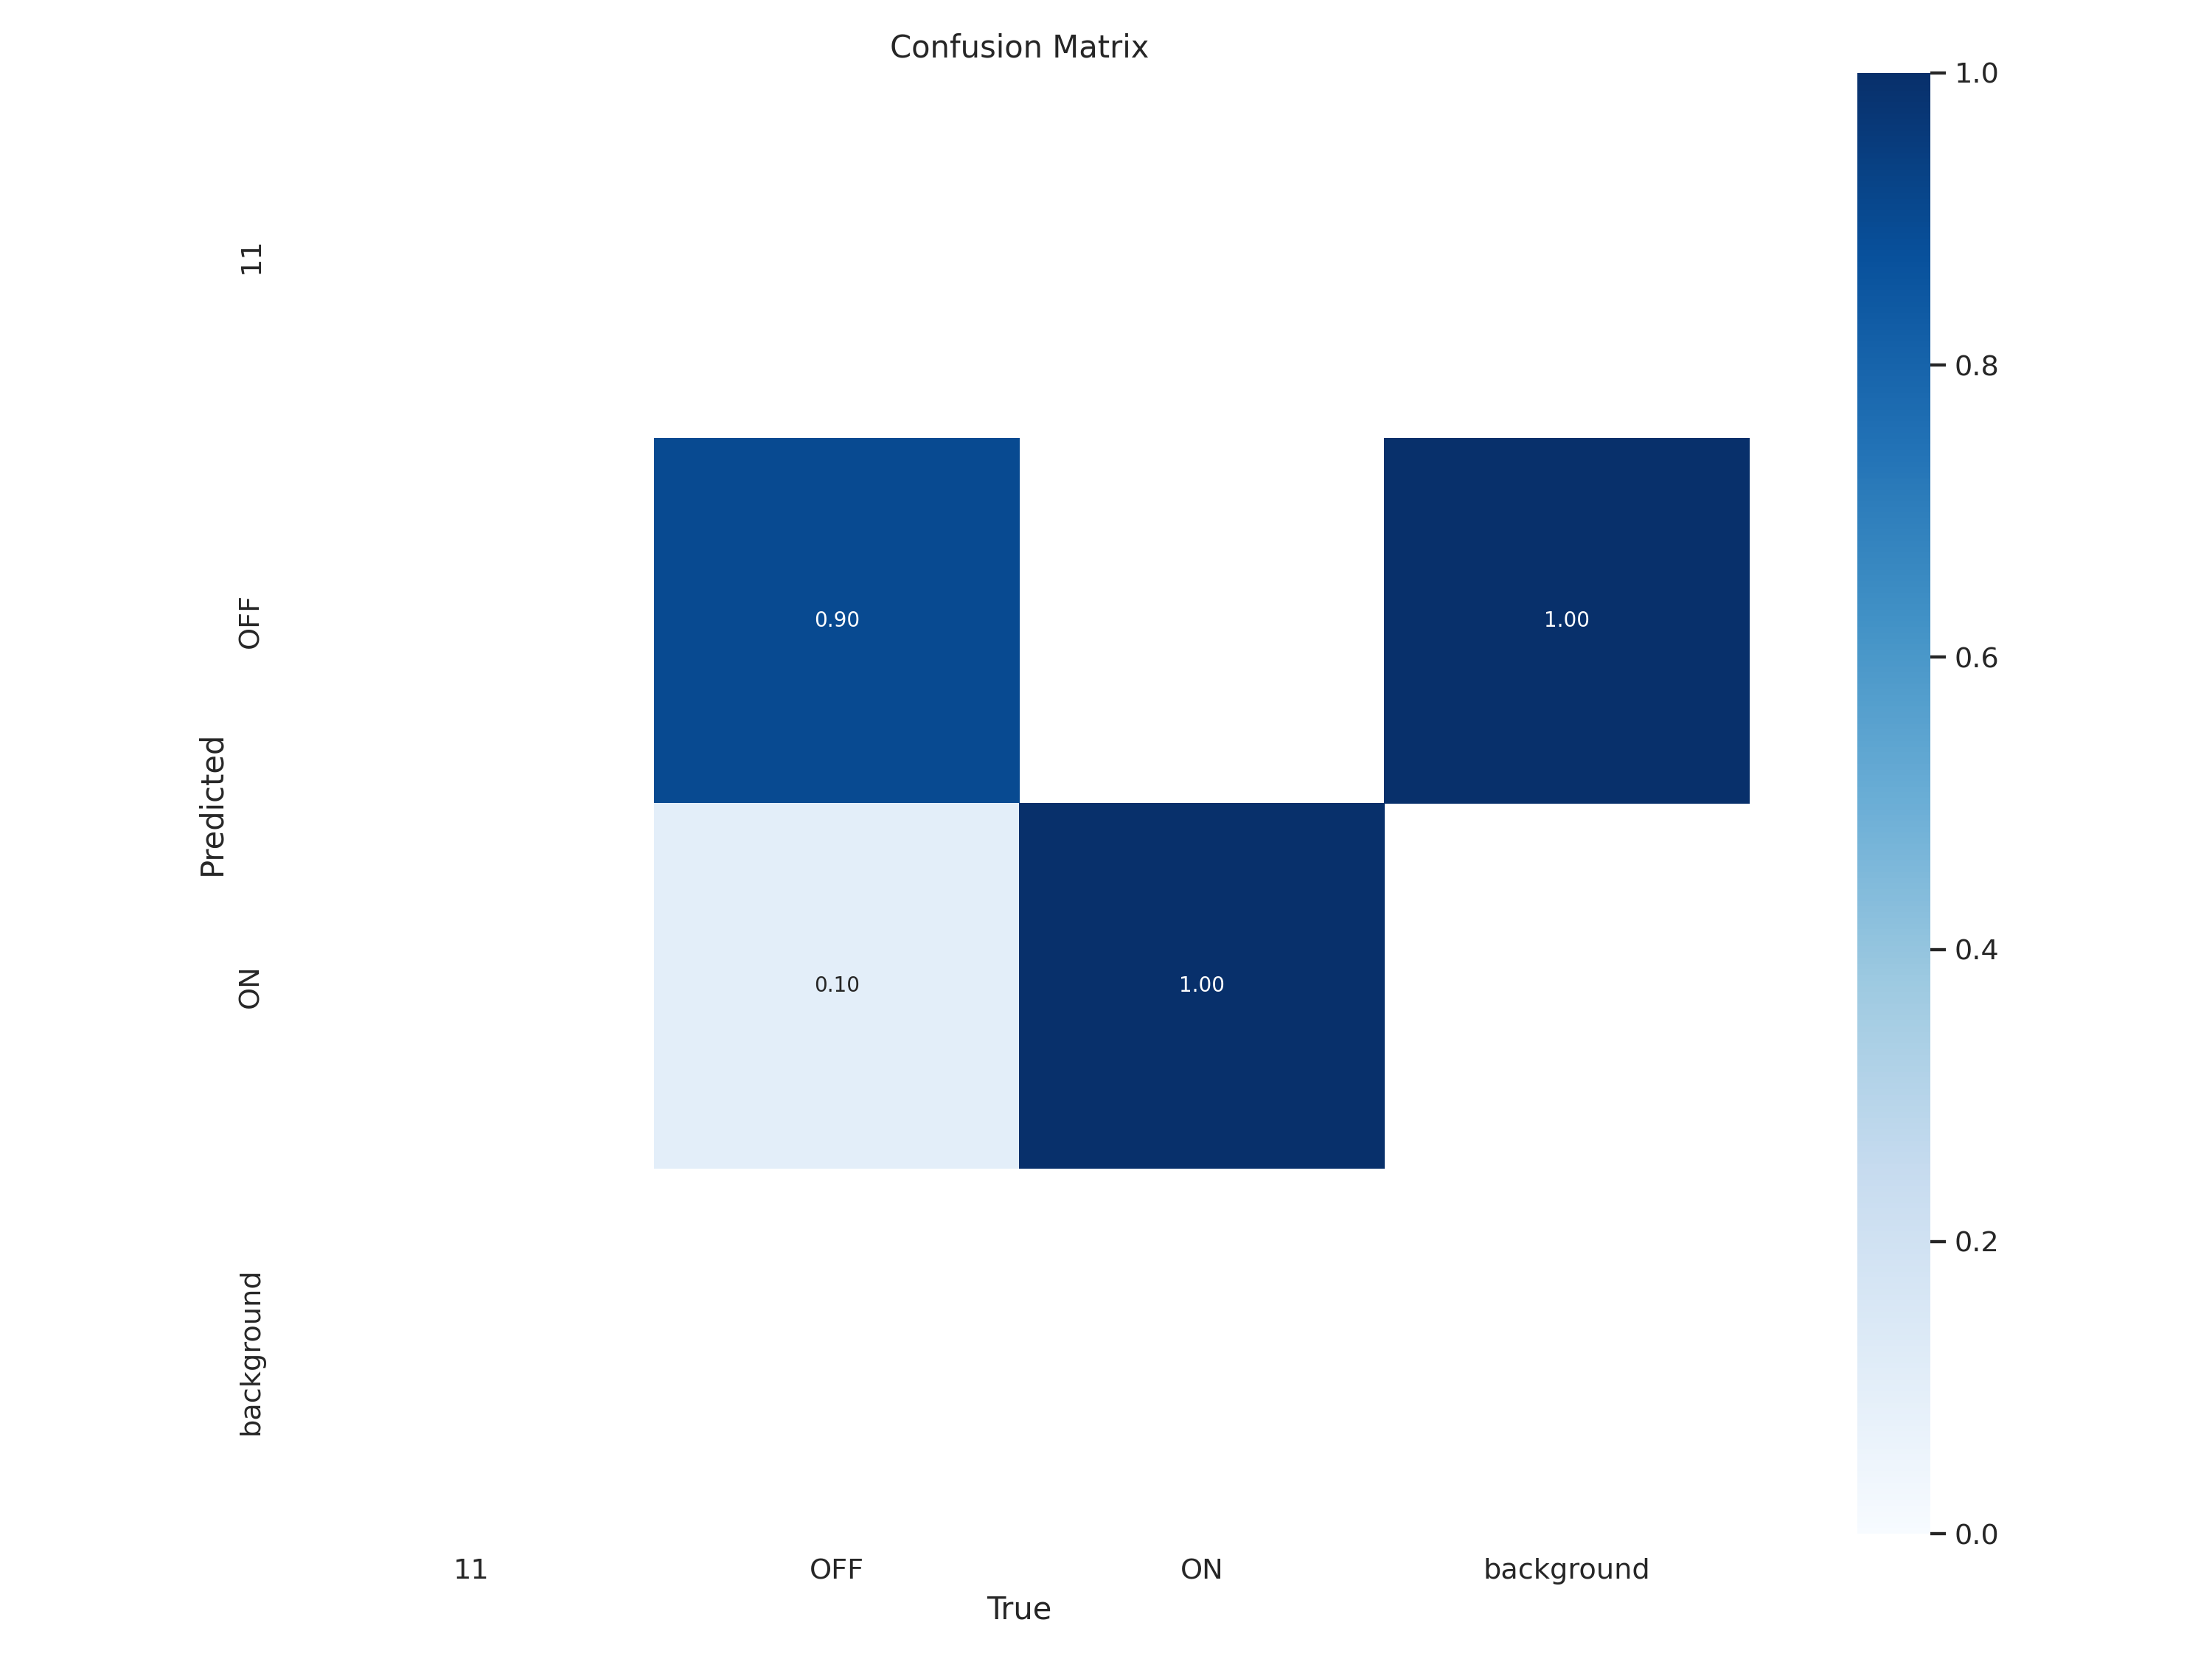

In [56]:
%cd {HOME}
Image(filename=f'{HOME}/runs/detect/train/confusion_matrix.png', width=600)

/content


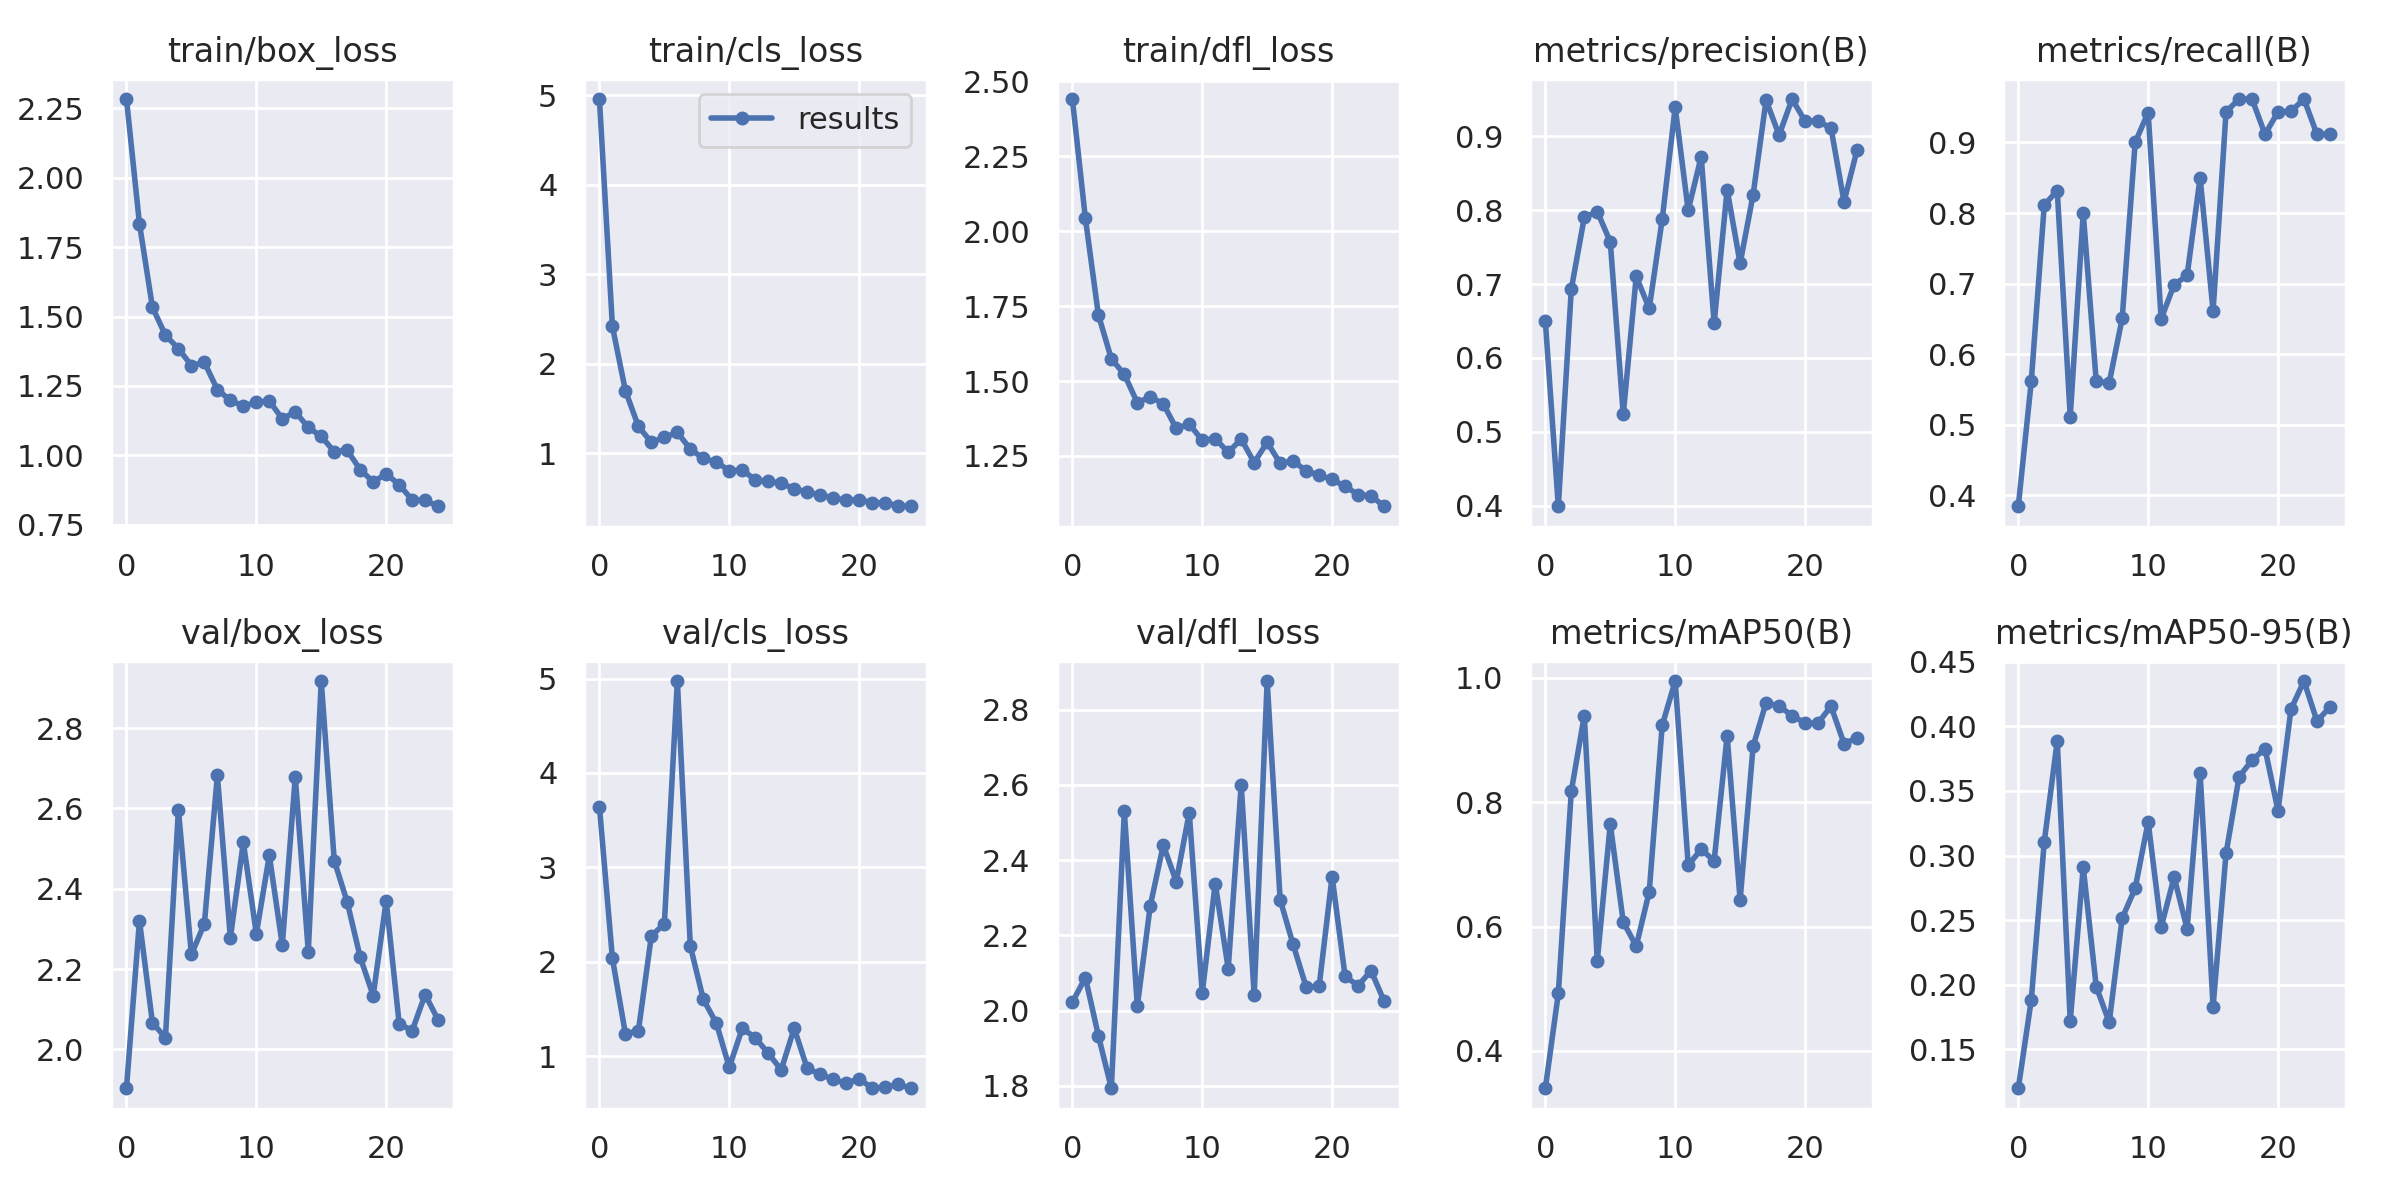

In [57]:
%cd {HOME}
Image(filename=f'{HOME}/runs/detect/train/results.png', width=600)

/content


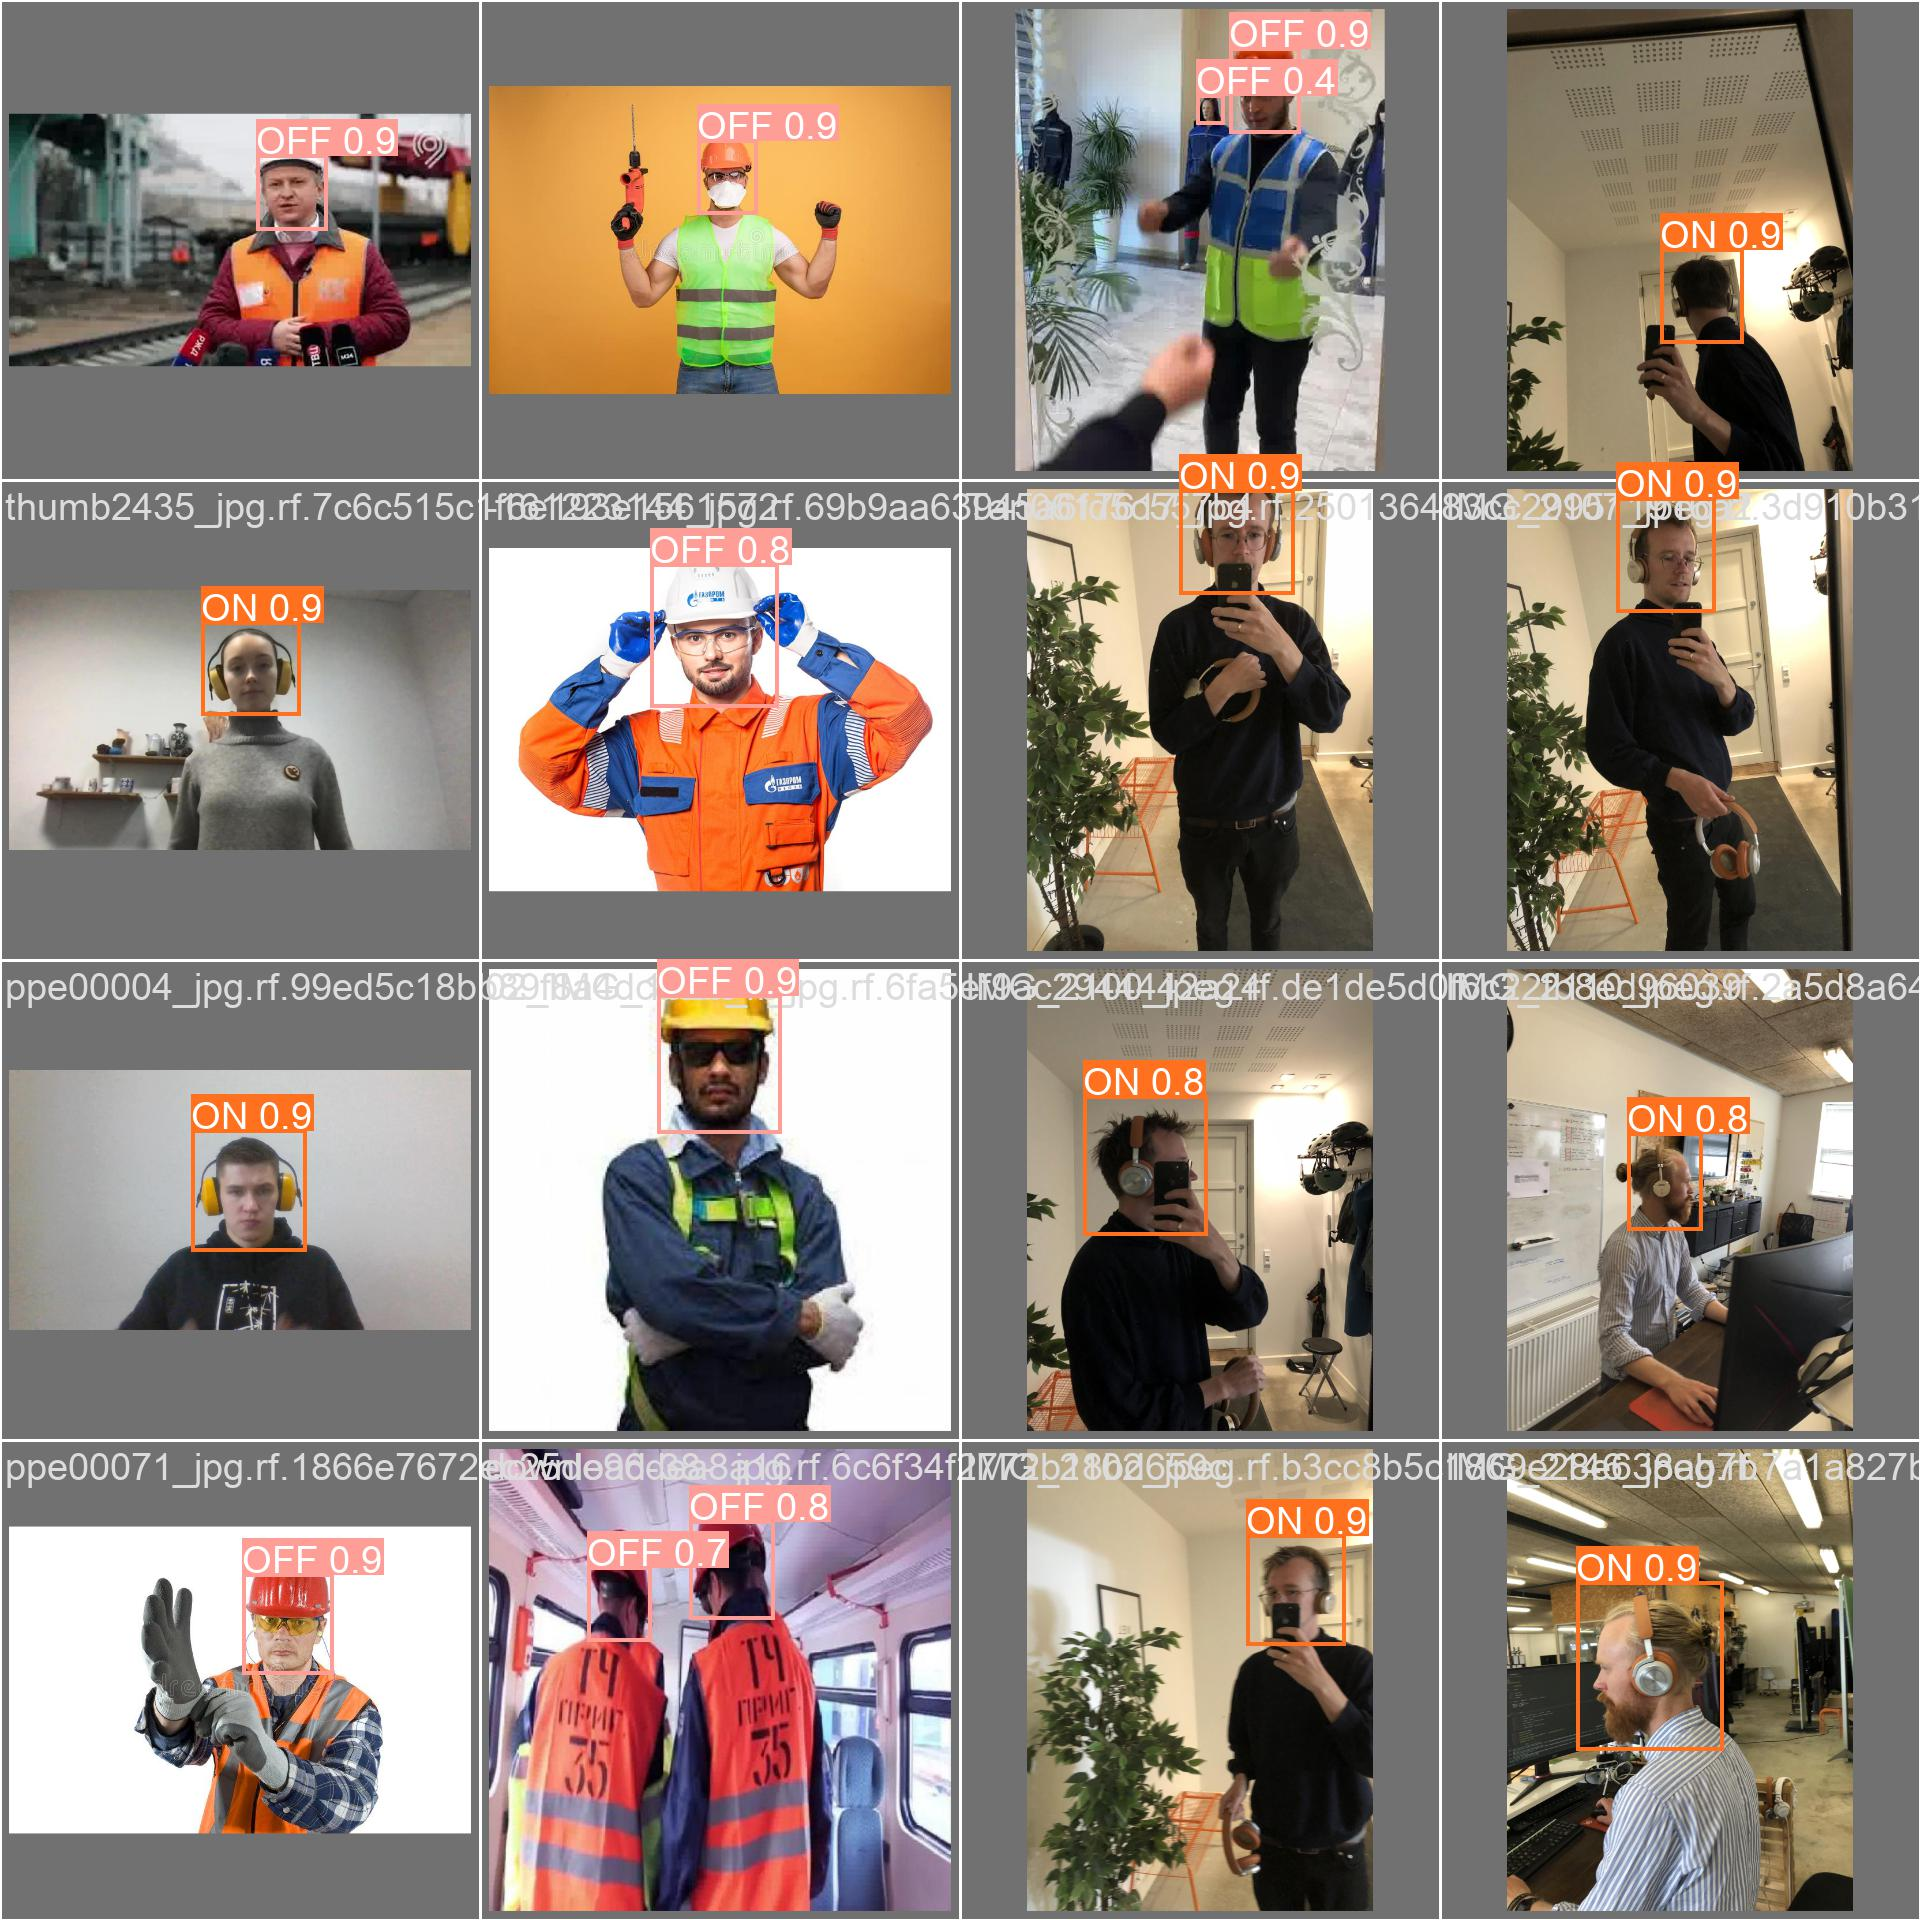

In [58]:
%cd {HOME}
Image(filename=f'{HOME}/runs/detect/train/val_batch0_pred.jpg', width=600)

In [54]:
!yolo task=detect mode=predict model={HOME}/runs/detect/train/weights/best.pt conf=0.4 source=/content/ppe.mp4 save=True

Ultralytics YOLOv8.0.20 🚀 Python-3.8.10 torch-1.13.1+cu116 CUDA:0 (Tesla T4, 15110MiB)
Model summary (fused): 168 layers, 11126745 parameters, 0 gradients, 28.4 GFLOPs
video 1/1 (1/944) /content/ppe.mp4: 480x800 1 OFF, 17.2ms
video 1/1 (2/944) /content/ppe.mp4: 480x800 1 OFF, 1 ON, 16.4ms
video 1/1 (3/944) /content/ppe.mp4: 480x800 1 OFF, 18.9ms
video 1/1 (4/944) /content/ppe.mp4: 480x800 1 OFF, 16.7ms
video 1/1 (5/944) /content/ppe.mp4: 480x800 1 OFF, 1 ON, 16.5ms
video 1/1 (6/944) /content/ppe.mp4: 480x800 1 OFF, 1 ON, 16.5ms
video 1/1 (7/944) /content/ppe.mp4: 480x800 1 OFF, 1 ON, 16.6ms
video 1/1 (8/944) /content/ppe.mp4: 480x800 1 OFF, 1 ON, 22.2ms
video 1/1 (9/944) /content/ppe.mp4: 480x800 1 OFF, 16.4ms
video 1/1 (10/944) /content/ppe.mp4: 480x800 1 OFF, 15.7ms
video 1/1 (11/944) /content/ppe.mp4: 480x800 1 OFF, 19.2ms
video 1/1 (12/944) /content/ppe.mp4: 480x800 1 OFF, 1 ON, 21.8ms
video 1/1 (13/944) /content/ppe.mp4: 480x800 1 OFF, 1 ON, 22.8ms
video 1/1 (14/944) /content/ppe.

## Validate Custom Model

In [17]:
%cd {HOME}

!yolo task=detect mode=val model={HOME}/runs/detect/train/weights/best.pt data={dataset.location}/data.yaml

/content
Ultralytics YOLOv8.0.20 🚀 Python-3.8.10 torch-1.13.1+cu116 CUDA:0 (Tesla T4, 15110MiB)
Model summary (fused): 168 layers, 11126745 parameters, 0 gradients, 28.4 GFLOPs
val: Scanning /content/datasets/Headphones-detection-4/valid/labels.cache... 21 images, 0 backgrounds, 0 corrupt: 100% 21/21 [00:00<?, ?it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100% 2/2 [00:02<00:00,  1.03s/it]
                   all         21         23      0.911      0.962      0.955      0.436
                   OFF         21         10      0.993          1      0.995       0.42
                    ON         21         13      0.829      0.923      0.915      0.451
Speed: 0.3ms pre-process, 25.3ms inference, 0.0ms loss, 1.4ms post-process per image


## Inference with Custom Model

In [24]:
%cd {HOME}
!yolo task=detect mode=predict model={HOME}/runs/detect/train/weights/best.pt conf=0.4 source={dataset.location}/test/images save=True

/content
Ultralytics YOLOv8.0.20 🚀 Python-3.8.10 torch-1.13.1+cu116 CUDA:0 (Tesla T4, 15110MiB)
Model summary (fused): 168 layers, 11126745 parameters, 0 gradients, 28.4 GFLOPs
image 1/10 /content/datasets/Headphones-detection-4/test/images/104016_jpg.rf.17369645244116c6ebaad619f155e6b3.jpg: 544x800 1 ON, 18.9ms
image 2/10 /content/datasets/Headphones-detection-4/test/images/IMG_2106_jpeg.rf.096208eb6a65697710ac55fb8434c7e5.jpg: 800x608 1 ON, 20.8ms
image 3/10 /content/datasets/Headphones-detection-4/test/images/IMG_2148_jpeg.rf.d7ea44e53bdb7a7cc2024b341dc225bd.jpg: 800x608 1 ON, 19.8ms
image 4/10 /content/datasets/Headphones-detection-4/test/images/IMG_2149_jpeg.rf.a9c5805f1095f28f9f1a449bb3356321.jpg: 800x608 1 ON, 19.8ms
image 5/10 /content/datasets/Headphones-detection-4/test/images/IMG_2158_jpeg.rf.1b2a8e286c5a6c61741cb24c16f32c57.jpg: 800x608 1 ON, 20.1ms
image 6/10 /content/datasets/Headphones-detection-4/test/images/closeup-portrait-smiling-craftsman-thumbs-up-sign-orange-prote

In [25]:
import glob
from IPython.display import Image, display

**NOTE:** Let's take a look at few results.

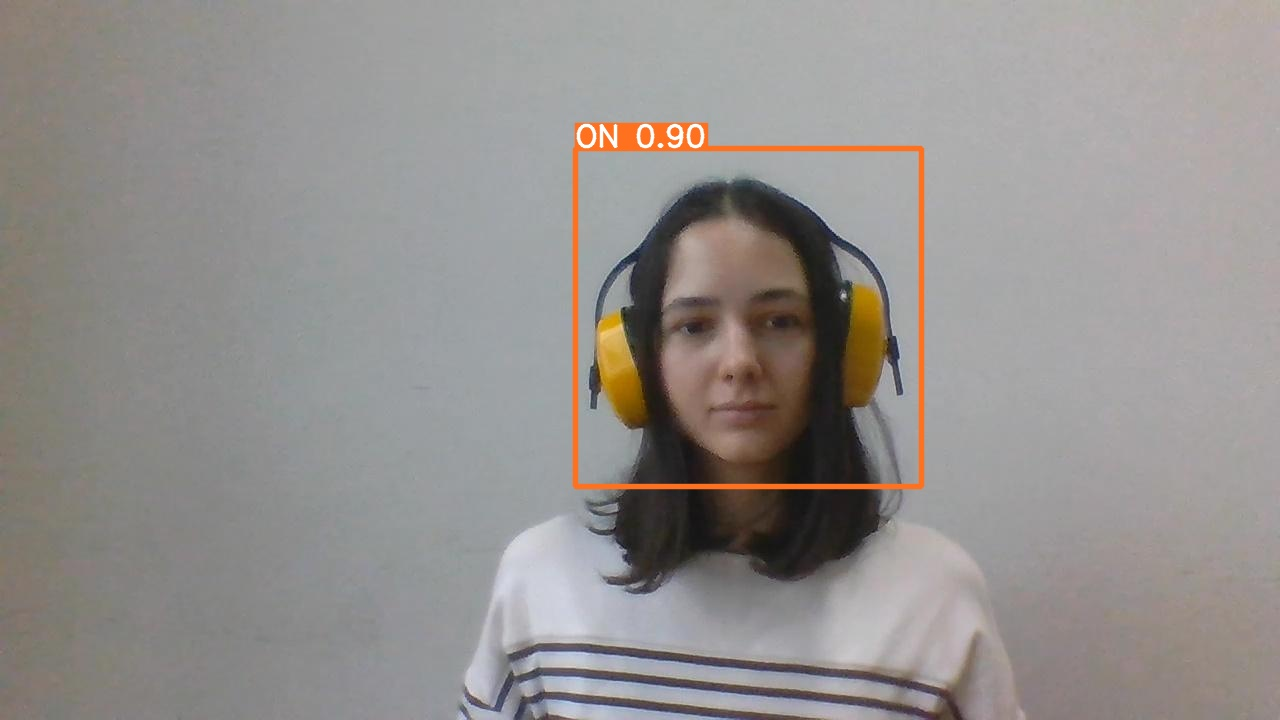

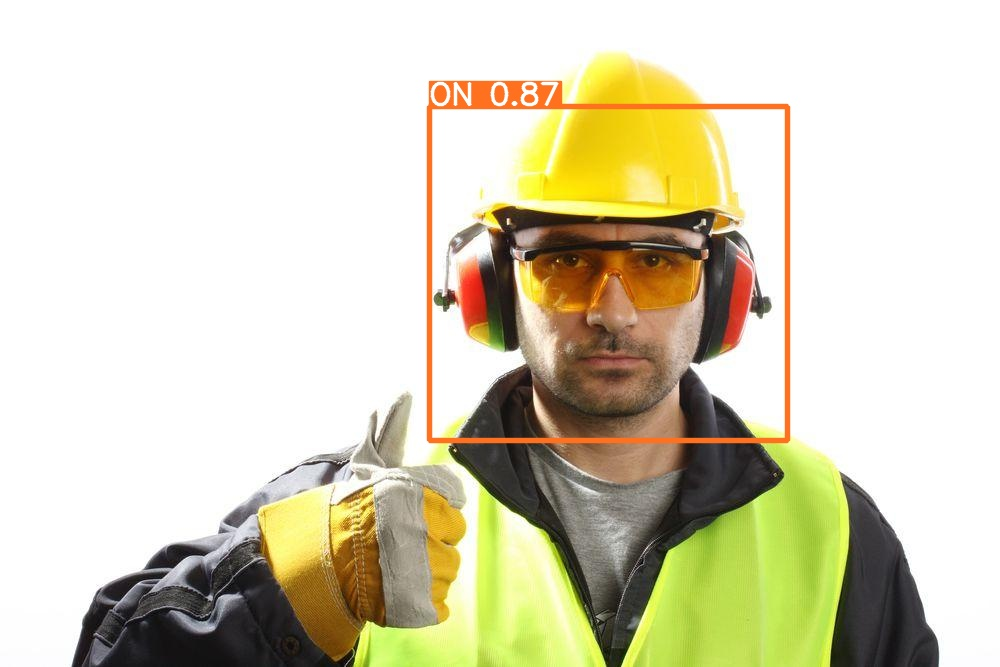

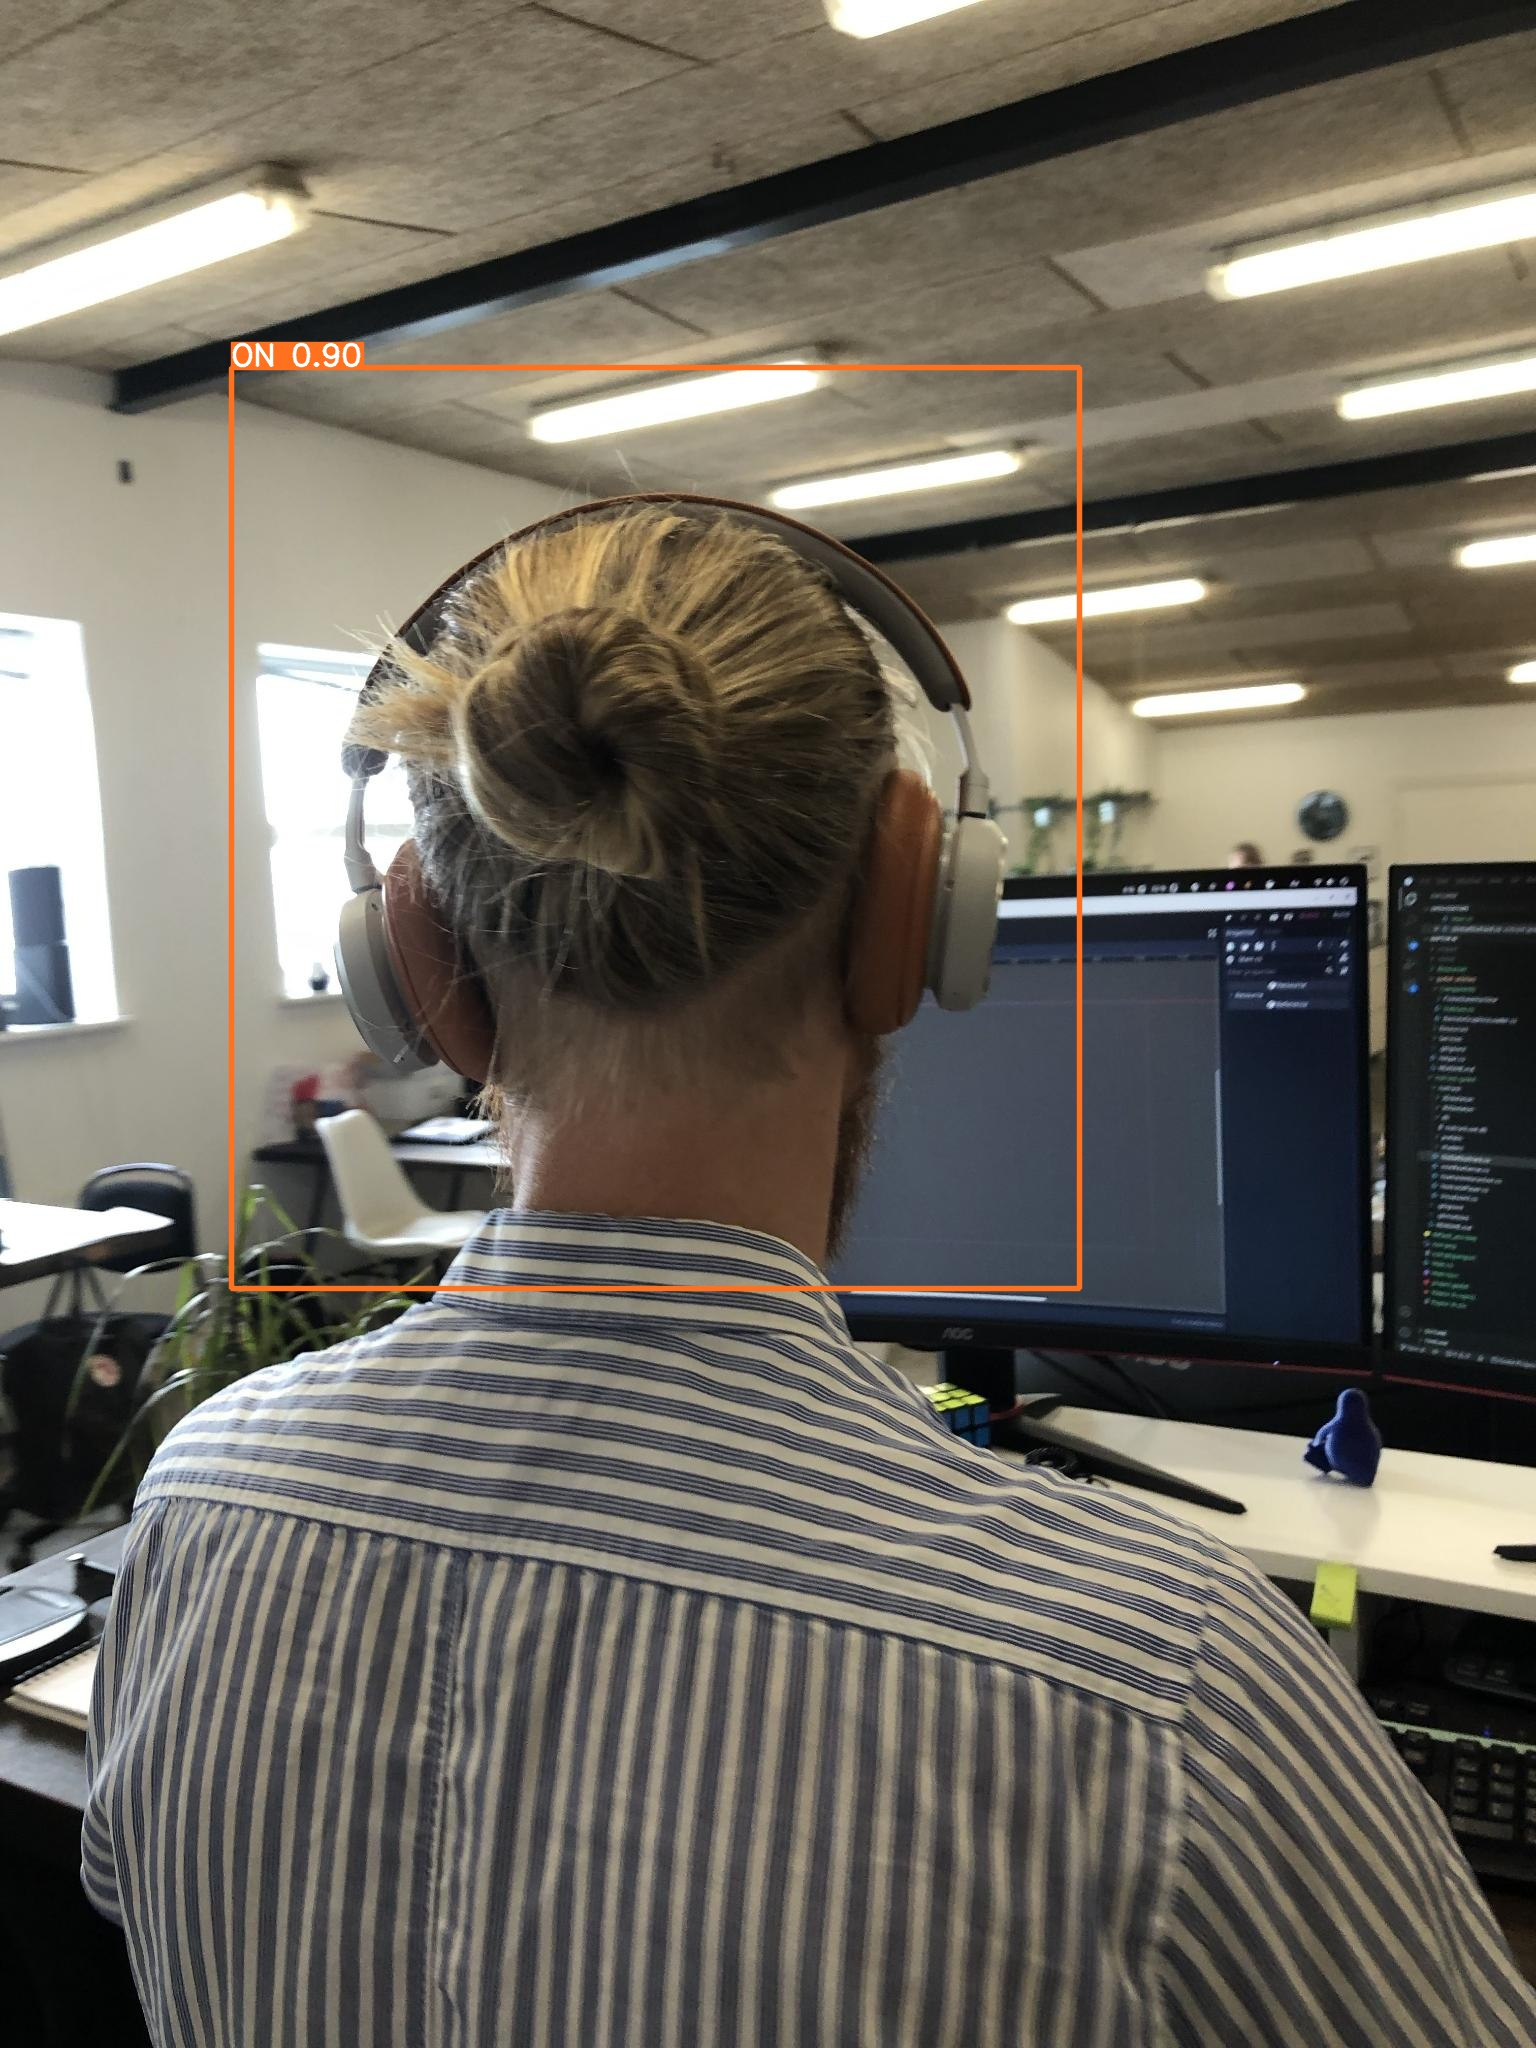

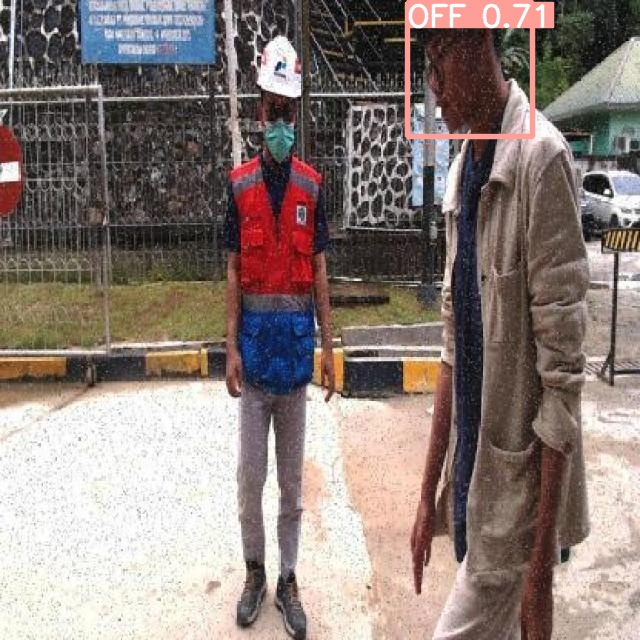

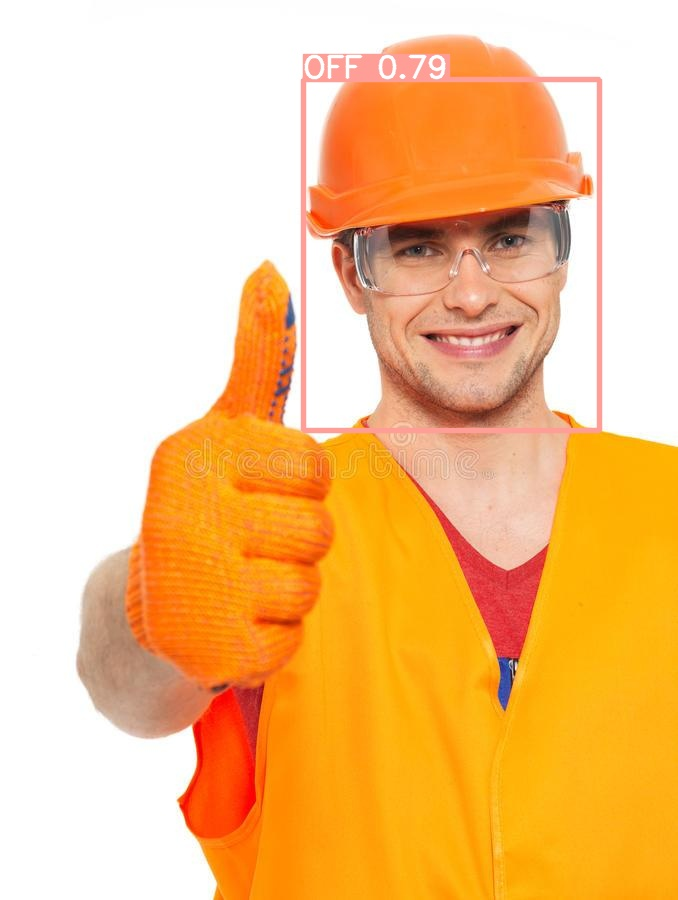

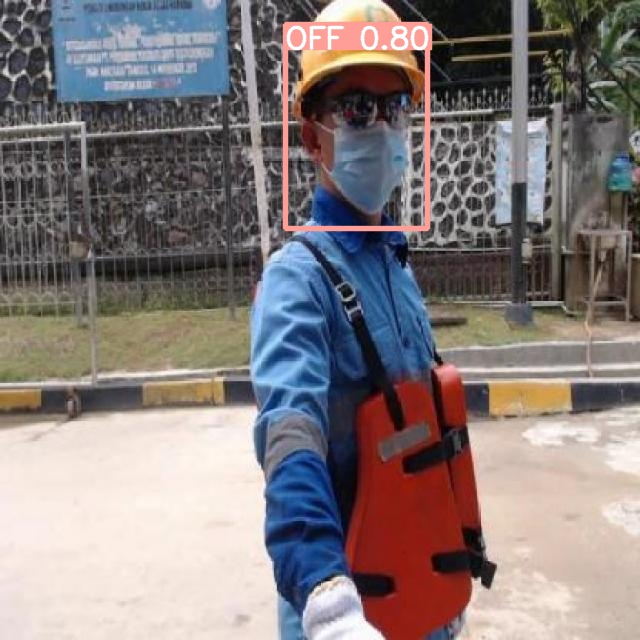

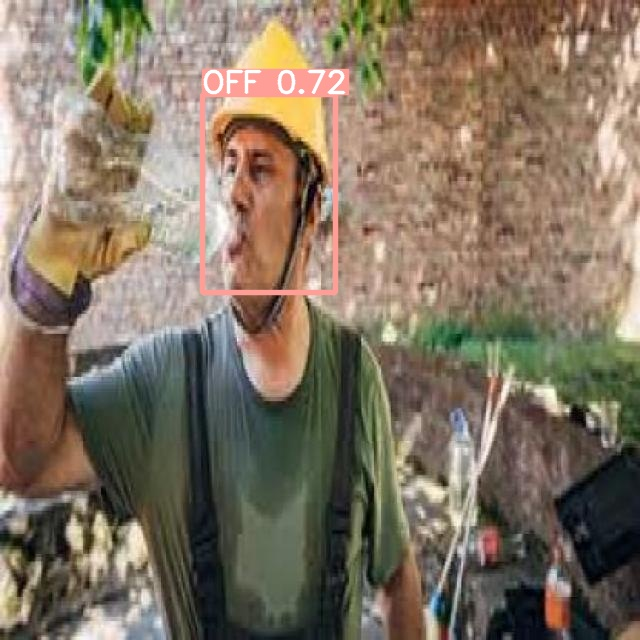

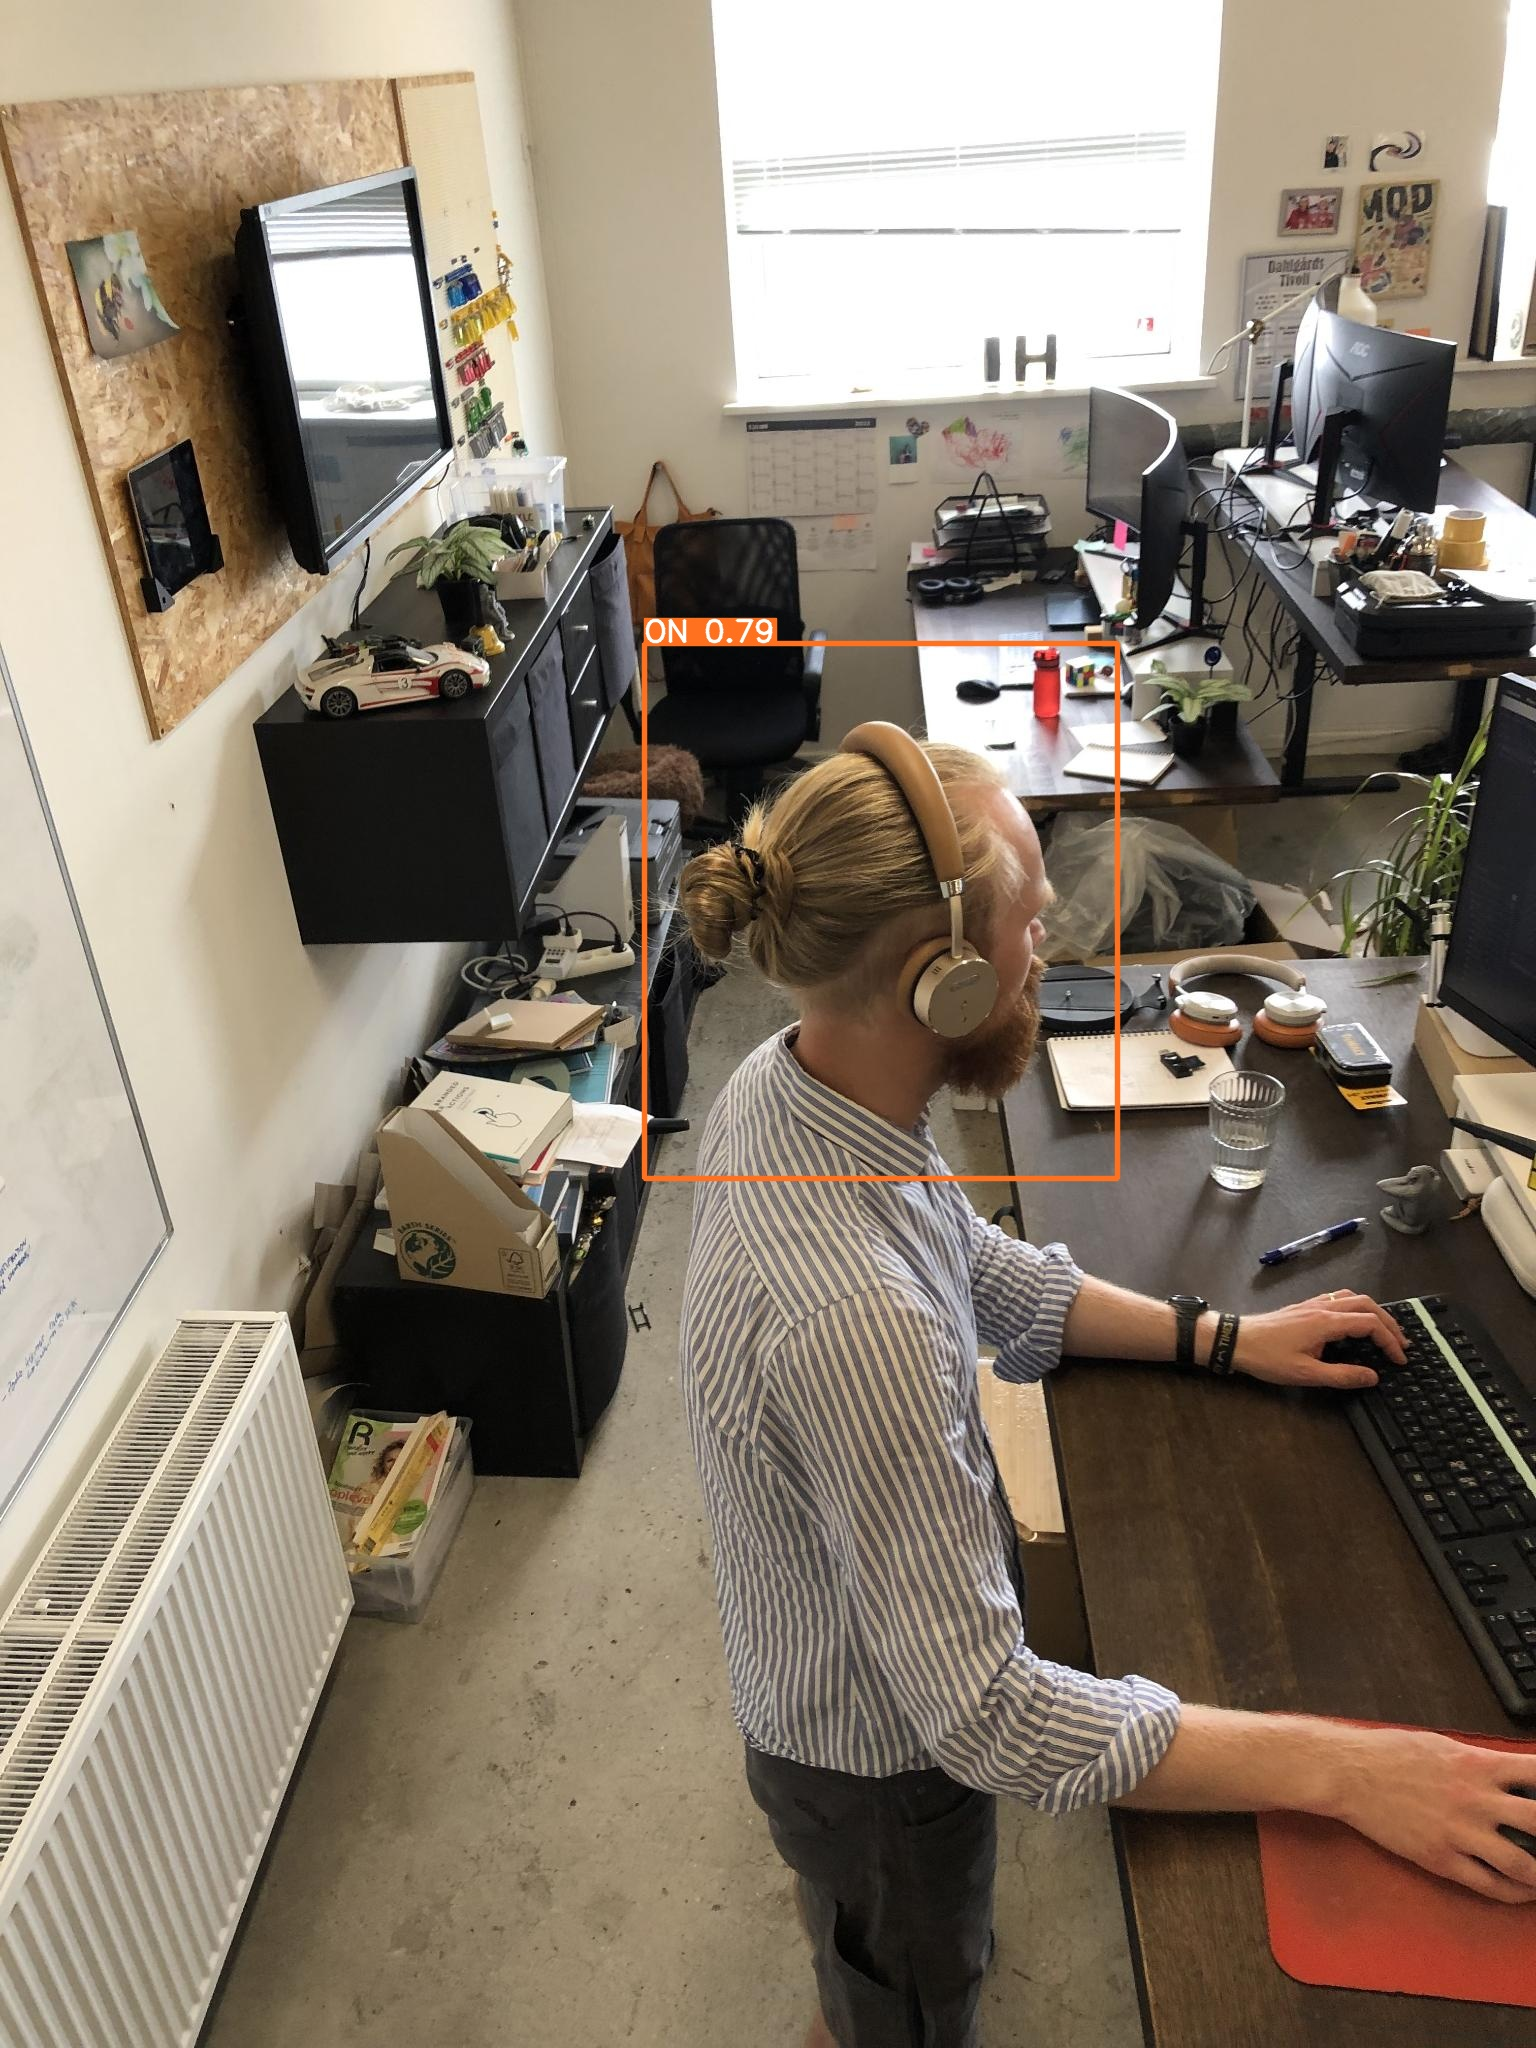

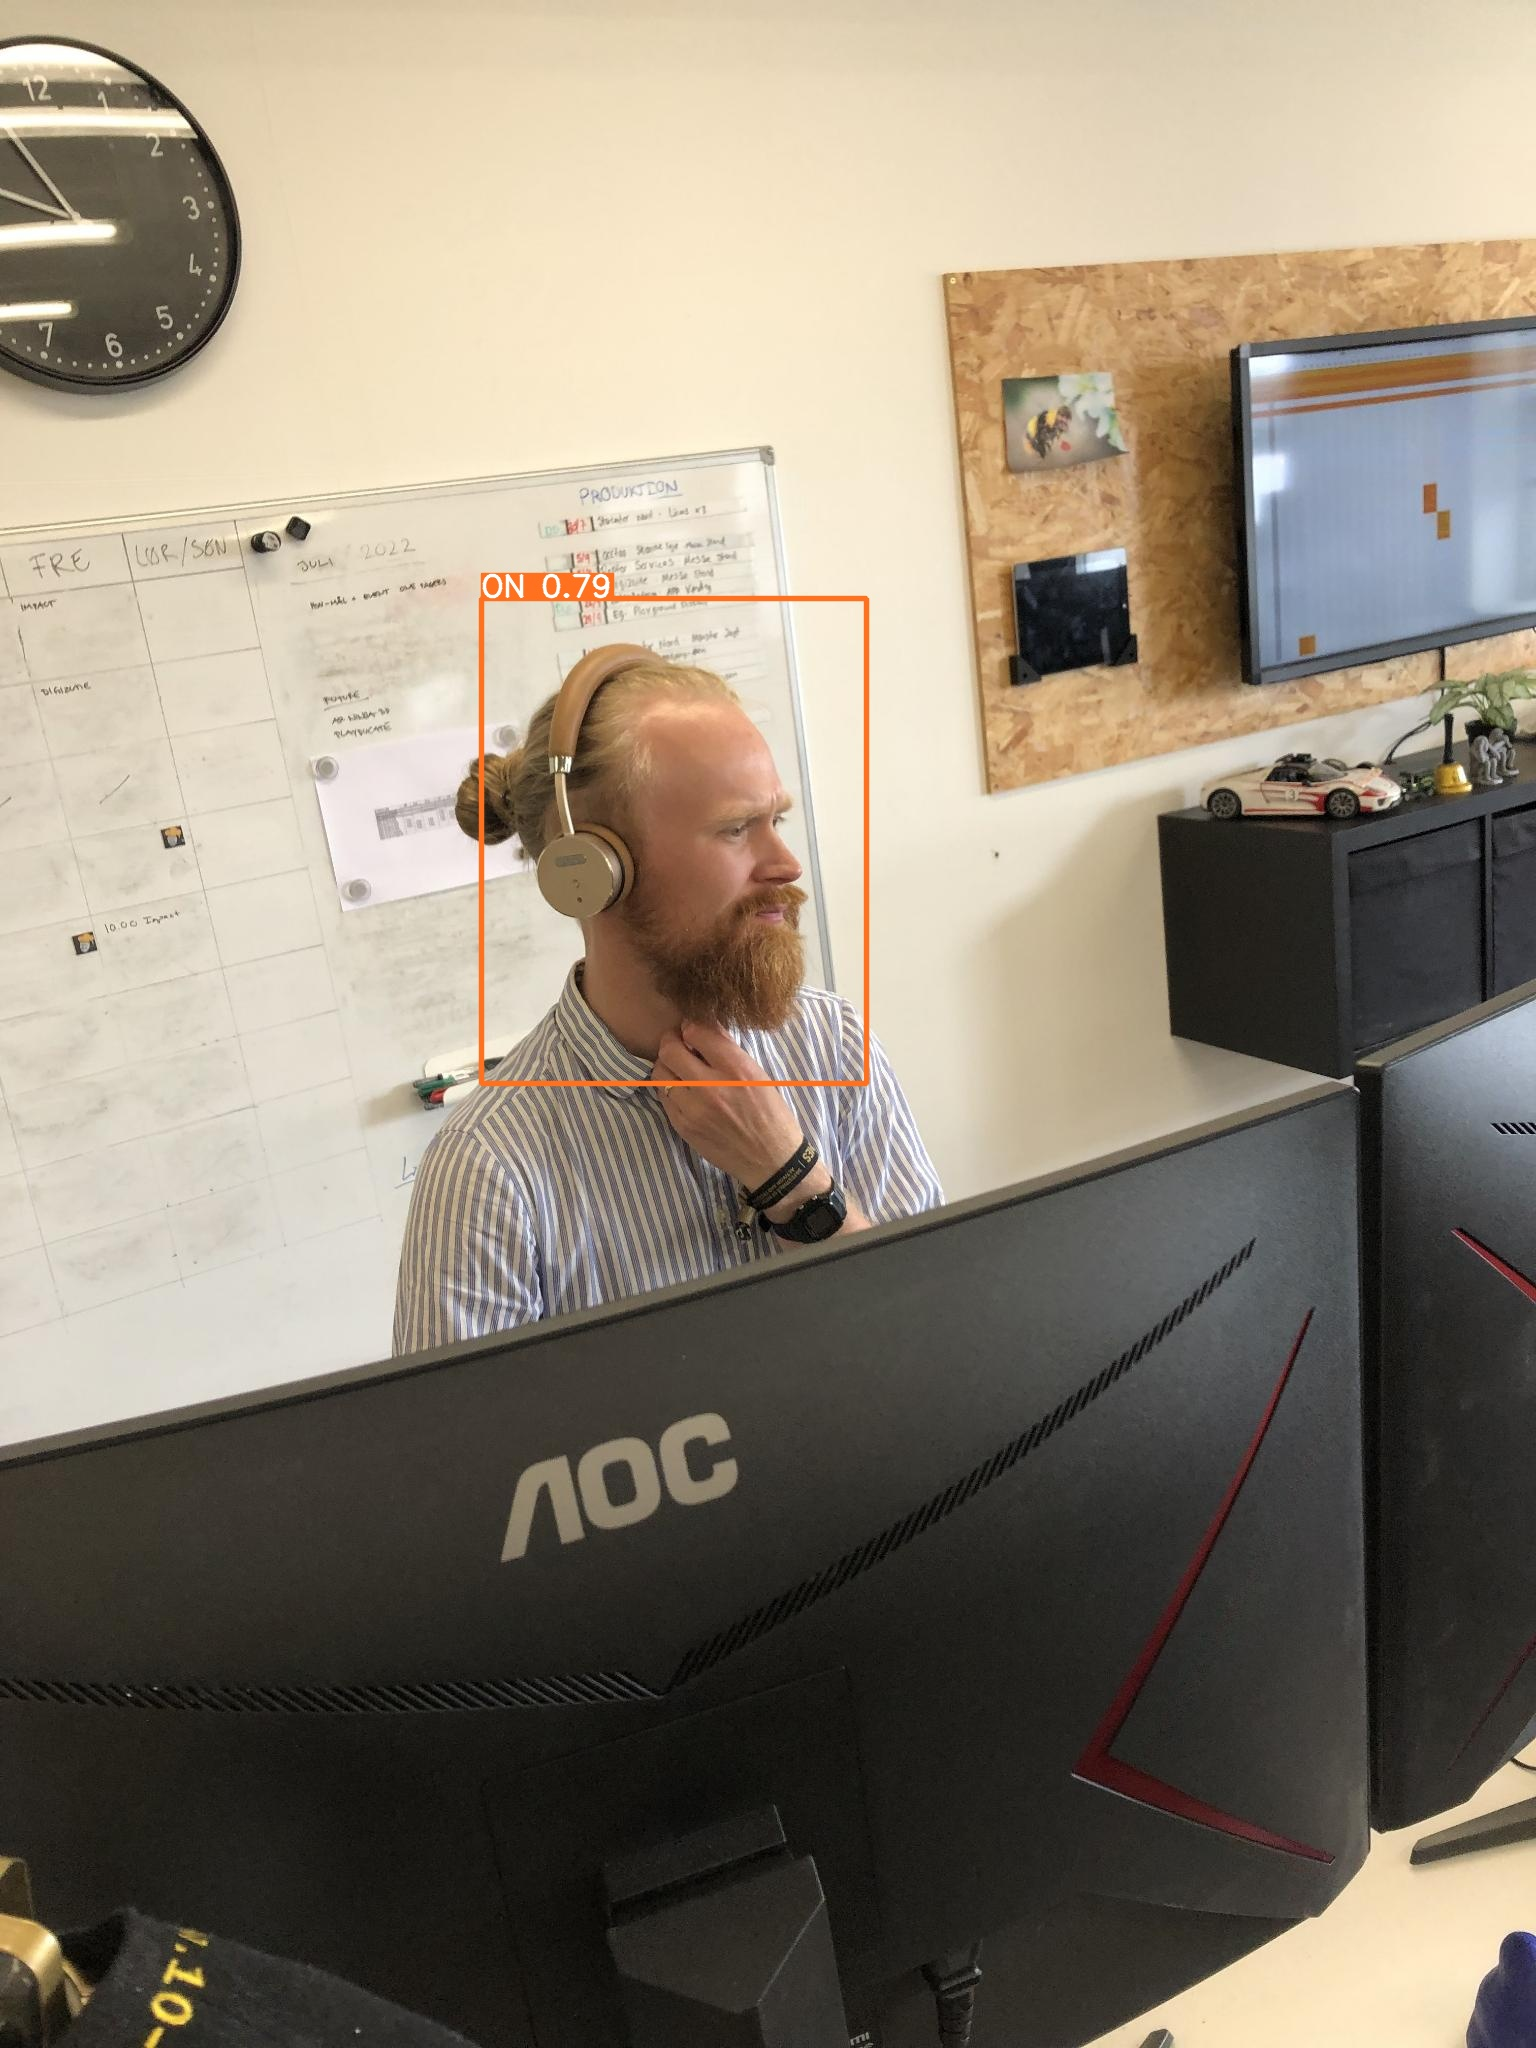

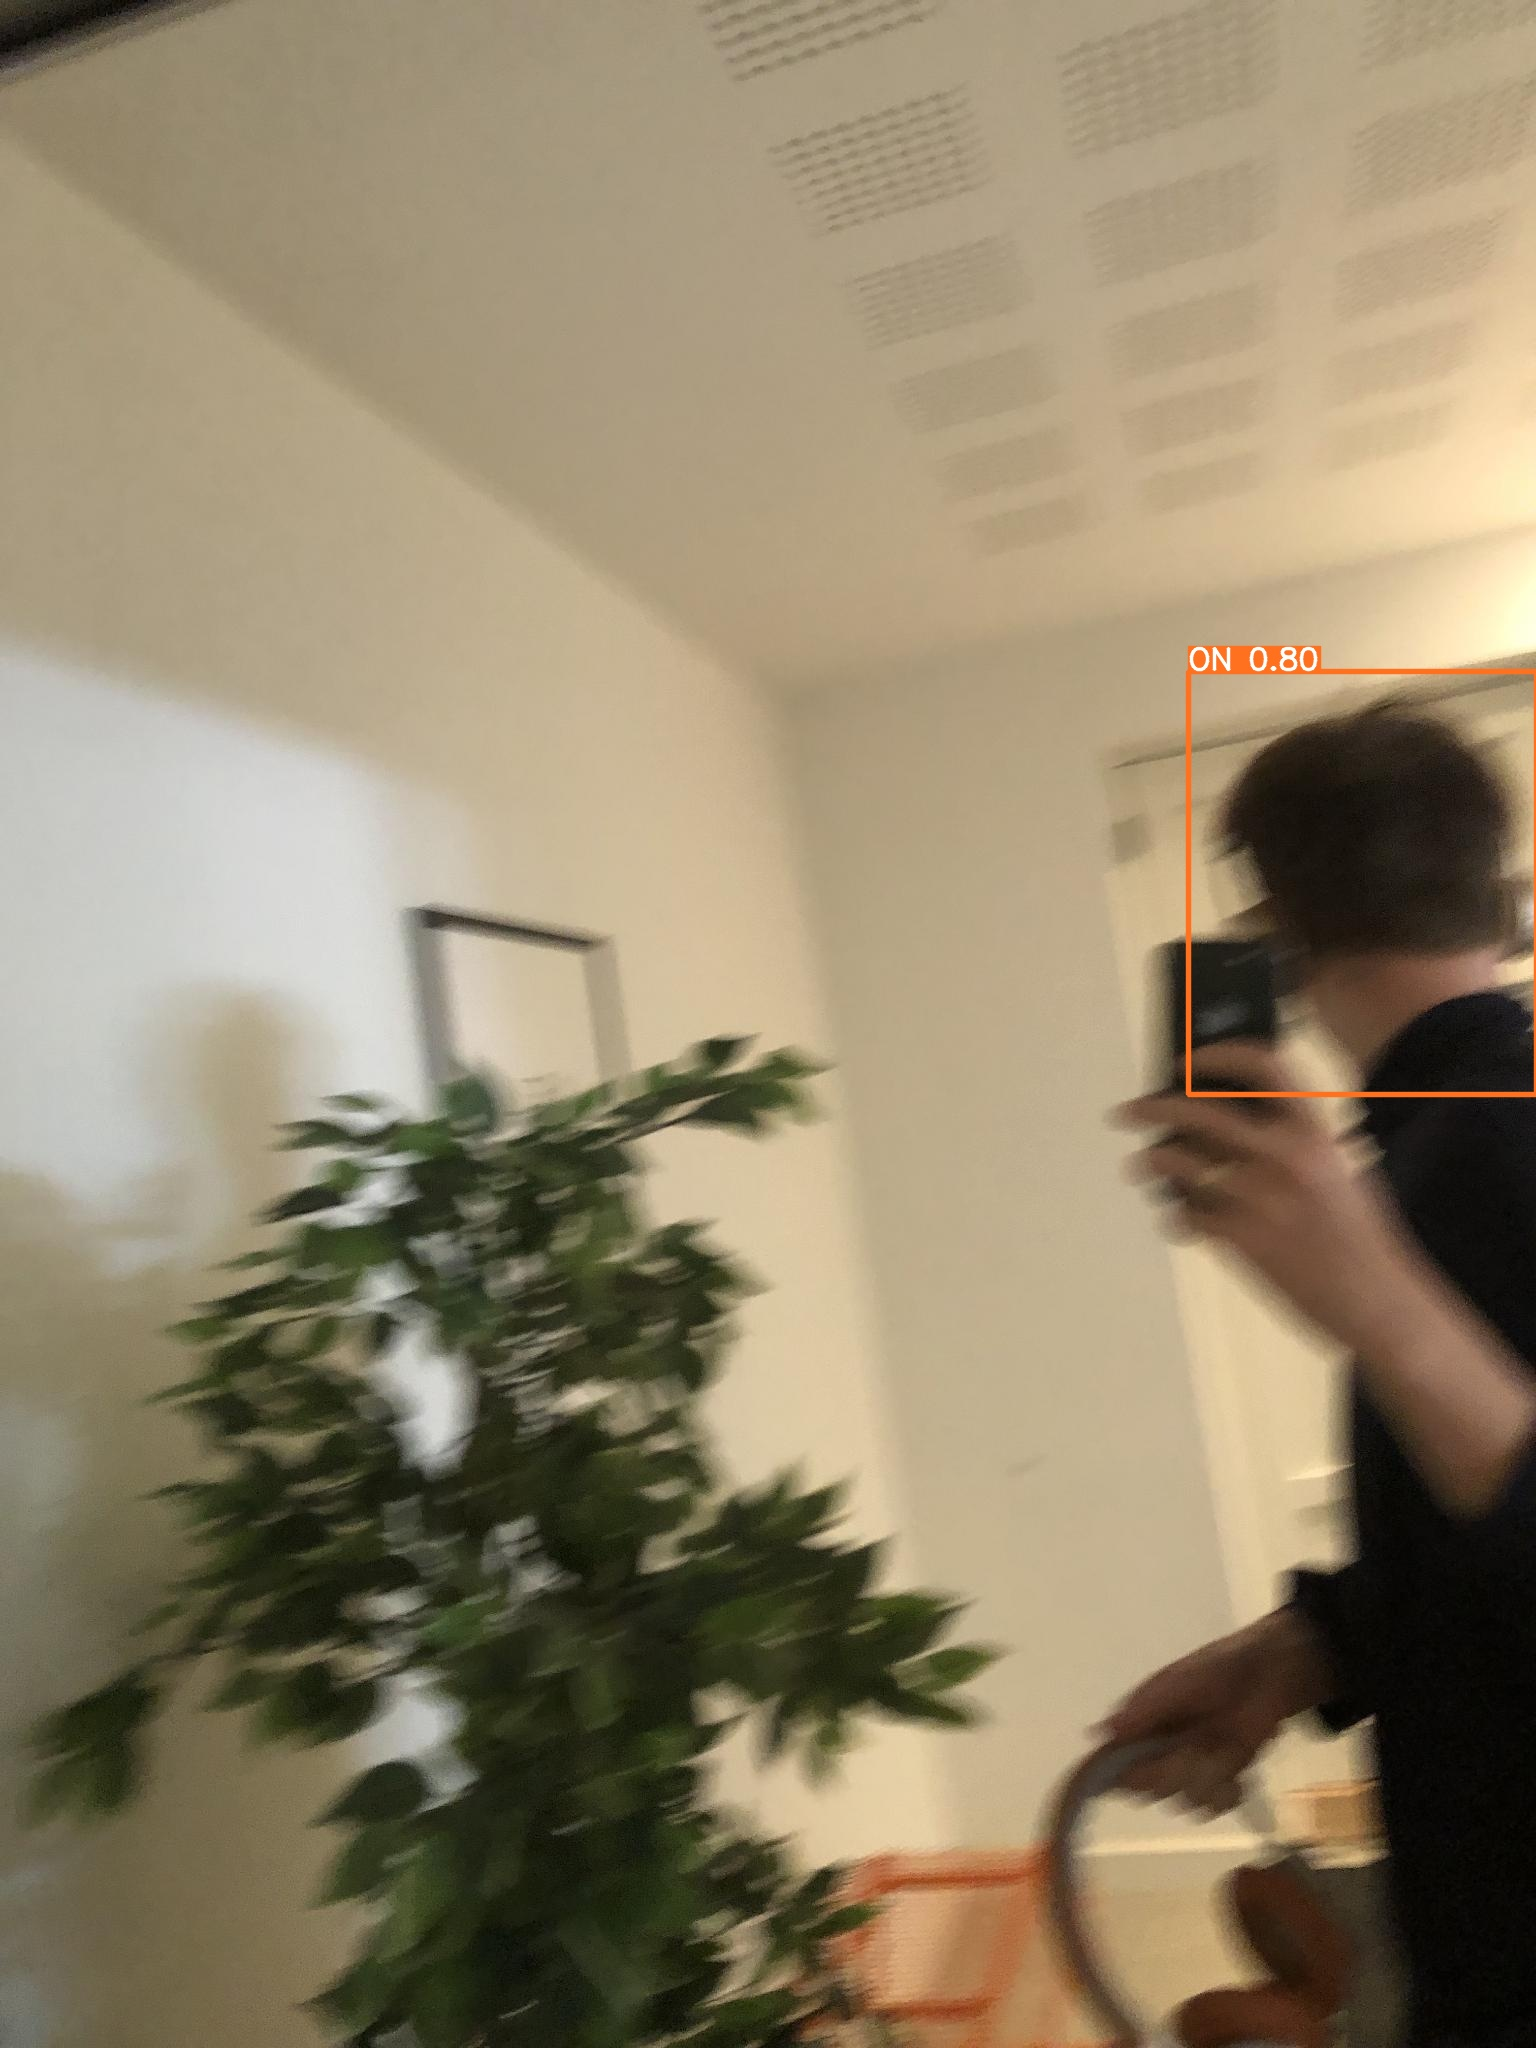

In [27]:
for image_path in glob.glob(f'{HOME}/runs/detect/predict5/*.jpg'):
      display(Image(filename=image_path, width=200))
      print("\n")

## Deploy model on Roboflow

Once you have finished training your YOLOv8 model, you’ll have a set of trained weights ready for use. These weights will be in the `/runs/detect/train/weights/best.pt` folder of your project. You can upload your model weights to Roboflow Deploy to use your trained weights on our infinitely scalable infrastructure.

The `.deploy()` function in the [Roboflow pip package](https://docs.roboflow.com/python) now supports uploading YOLOv8 weights.

To upload model weights, add the following code to the “Inference with Custom Model” section in the aforementioned notebook:

In [32]:
project.version(dataset.version).deploy(model_type="yolov8", model_path=f"{HOME}/runs/detect/train/")

View the status of your deployment at: https://app.roboflow.com/tatsi-shagova-pftso/headphones-detection/deploy/4
Share your model with the world at: https://universe.roboflow.com/tatsi-shagova-pftso/headphones-detection/model/4


In [33]:
%cd {HOME}
!yolo task=detect mode=predict model={HOME}/runs/detect/train/weights/best.pt conf=0.4 source=/content/image_2023_02_08T11_51_02_925Z.png save=True

/content
Ultralytics YOLOv8.0.20 🚀 Python-3.8.10 torch-1.13.1+cu116 CUDA:0 (Tesla T4, 15110MiB)
Model summary (fused): 168 layers, 11126745 parameters, 0 gradients, 28.4 GFLOPs
image 1/1 /content/image_2023_02_08T11_51_02_925Z.png: 480x800 21.8ms
Speed: 0.8ms pre-process, 21.8ms inference, 1.0ms postprocess per image at shape (1, 3, 800, 800)
Results saved to runs/detect/predict6


In [34]:
%cd {HOME}
!yolo task=detect mode=predict model={HOME}/runs/detect/train/weights/best.pt conf=0.4 source=/content/image_2023_02_08T11_51_16_105Z.png save=True
!yolo task=detect mode=predict model={HOME}/runs/detect/train/weights/best.pt conf=0.4 source=/content/image_2023_02_08T12_26_55_199Z.png save=True

/content
Ultralytics YOLOv8.0.20 🚀 Python-3.8.10 torch-1.13.1+cu116 CUDA:0 (Tesla T4, 15110MiB)
Model summary (fused): 168 layers, 11126745 parameters, 0 gradients, 28.4 GFLOPs
image 1/1 /content/image_2023_02_08T11_51_16_105Z.png: 480x800 17.4ms
Speed: 0.8ms pre-process, 17.4ms inference, 0.7ms postprocess per image at shape (1, 3, 800, 800)
Results saved to runs/detect/predict7
Ultralytics YOLOv8.0.20 🚀 Python-3.8.10 torch-1.13.1+cu116 CUDA:0 (Tesla T4, 15110MiB)
Model summary (fused): 168 layers, 11126745 parameters, 0 gradients, 28.4 GFLOPs
image 1/1 /content/image_2023_02_08T12_26_55_199Z.png: 480x800 1 OFF, 17.3ms
Speed: 0.6ms pre-process, 17.3ms inference, 1.9ms postprocess per image at shape (1, 3, 800, 800)
Results saved to runs/detect/predict8


In [35]:
!yolo task=detect mode=predict model={HOME}/runs/detect/train/weights/best.pt conf=0.35 source=/content/image_2023_02_08T12_26_55_199Z.png save=True

Ultralytics YOLOv8.0.20 🚀 Python-3.8.10 torch-1.13.1+cu116 CUDA:0 (Tesla T4, 15110MiB)
Model summary (fused): 168 layers, 11126745 parameters, 0 gradients, 28.4 GFLOPs
image 1/1 /content/image_2023_02_08T12_26_55_199Z.png: 480x800 1 OFF, 17.6ms
Speed: 0.7ms pre-process, 17.6ms inference, 1.9ms postprocess per image at shape (1, 3, 800, 800)
Results saved to runs/detect/predict9


In [37]:
!yolo task=detect mode=predict model={HOME}/runs/detect/train/weights/best.pt conf=0.4 source=/content/Screen_Recording_2023-02-14_at_13.47.05.mp4 save=True

Ultralytics YOLOv8.0.20 🚀 Python-3.8.10 torch-1.13.1+cu116 CUDA:0 (Tesla T4, 15110MiB)
Model summary (fused): 168 layers, 11126745 parameters, 0 gradients, 28.4 GFLOPs
video 1/1 (1/318) /content/Screen_Recording_2023-02-14_at_13.47.05.mp4: 608x800 19.3ms
video 1/1 (2/318) /content/Screen_Recording_2023-02-14_at_13.47.05.mp4: 608x800 18.7ms
video 1/1 (3/318) /content/Screen_Recording_2023-02-14_at_13.47.05.mp4: 608x800 18.6ms
video 1/1 (4/318) /content/Screen_Recording_2023-02-14_at_13.47.05.mp4: 608x800 18.6ms
video 1/1 (5/318) /content/Screen_Recording_2023-02-14_at_13.47.05.mp4: 608x800 18.6ms
video 1/1 (6/318) /content/Screen_Recording_2023-02-14_at_13.47.05.mp4: 608x800 18.6ms
video 1/1 (7/318) /content/Screen_Recording_2023-02-14_at_13.47.05.mp4: 608x800 18.6ms
video 1/1 (8/318) /content/Screen_Recording_2023-02-14_at_13.47.05.mp4: 608x800 18.6ms
video 1/1 (9/318) /content/Screen_Recording_2023-02-14_at_13.47.05.mp4: 608x800 18.6ms
video 1/1 (10/318) /content/Screen_Recording_2023

In [38]:
!yolo task=detect mode=predict model={HOME}/runs/detect/train/weights/best.pt conf=0.4 source=/content/ppe.mp4 save=True

Ultralytics YOLOv8.0.20 🚀 Python-3.8.10 torch-1.13.1+cu116 CUDA:0 (Tesla T4, 15110MiB)
Model summary (fused): 168 layers, 11126745 parameters, 0 gradients, 28.4 GFLOPs
video 1/1 (1/944) /content/ppe.mp4: 480x800 1 OFF, 17.3ms
video 1/1 (2/944) /content/ppe.mp4: 480x800 1 OFF, 1 ON, 16.4ms
video 1/1 (3/944) /content/ppe.mp4: 480x800 1 OFF, 16.5ms
video 1/1 (4/944) /content/ppe.mp4: 480x800 1 OFF, 16.4ms
video 1/1 (5/944) /content/ppe.mp4: 480x800 1 OFF, 1 ON, 16.4ms
video 1/1 (6/944) /content/ppe.mp4: 480x800 1 OFF, 1 ON, 16.1ms
video 1/1 (7/944) /content/ppe.mp4: 480x800 1 OFF, 1 ON, 14.3ms
video 1/1 (8/944) /content/ppe.mp4: 480x800 1 OFF, 1 ON, 14.3ms
video 1/1 (9/944) /content/ppe.mp4: 480x800 1 OFF, 14.3ms
video 1/1 (10/944) /content/ppe.mp4: 480x800 1 OFF, 14.3ms
video 1/1 (11/944) /content/ppe.mp4: 480x800 1 OFF, 14.3ms
video 1/1 (12/944) /content/ppe.mp4: 480x800 1 OFF, 1 ON, 14.3ms
video 1/1 (13/944) /content/ppe.mp4: 480x800 1 OFF, 1 ON, 12.7ms
video 1/1 (14/944) /content/ppe.

In [ ]:
#While your deployment is processing, checkout the deployment docs to take your model to most destinations https://docs.roboflow.com/inference

In [60]:
#Run inference on your model on a persistant, auto-scaling, cloud API

#load model
model = project.version(dataset.version).model

#choose random test set image
import os, random
test_set_loc = dataset.location + "/test/images/"
random_test_image = random.choice(os.listdir(test_set_loc))
print("running inference on " + random_test_image)

pred = model.predict(test_set_loc + random_test_image, confidence=40, overlap=30).json()
pred

running inference on ppe00091_jpg.rf.7f00f9cd1f34be8794d2383823dd387e.jpg


{'predictions': [{'x': 744.0,
   'y': 320.5,
   'width': 350.0,
   'height': 335.0,
   'confidence': 0.8872506618499756,
   'class': 'ON',
   'image_path': '/content/datasets/Headphones-detection-4/test/images/ppe00091_jpg.rf.7f00f9cd1f34be8794d2383823dd387e.jpg',
   'prediction_type': 'ObjectDetectionModel'}],
 'image': {'width': '1280', 'height': '720'}}

This notebook was credited from roboflow.com 
https://blog.roboflow.com/how-to-train-yolov8-on-a-custom-dataset/